# Part I - (Ford GoBike System Data)
## by (Abdulkadir Nafisat)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [ ]:
data = pd.read_csv('201902-fordgobike-tripdata.csv')
data.head()

FileNotFoundError: ignored

In [ ]:
data.shape

(183412, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [ ]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> There are 183,412 individual ride information with 16 features (duration_sec, start_station_id, start_station_latitude, 	start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id 	user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most variables are numeric in nature, except for the start station name and end station name which are un-ordered labels.


### What is/are the main feature(s) of interest in your dataset?

> I am most interested in features that affects bike share for all trips and the duration of the Trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that duration, start_time and endtime columns are useful as it will help in time bound predictions, bike_id column for easy identification, and member_gender to help specity gender.

In [ ]:
data['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [ ]:
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Data Cleaning

#### we drop all null values

In [ ]:
#drop all null values in the dataset 
data1=data.dropna(subset = ['start_station_id','start_station_name','end_station_id','member_gender'])

#### Test

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [ ]:
data1.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [ ]:
data1['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [ ]:
data1['member_birth_year'].value_counts()

1988.0    10214
1993.0     9323
1989.0     8967
1990.0     8640
1991.0     8484
          ...  
1928.0        1
1878.0        1
1930.0        1
1910.0        1
1927.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [ ]:
data1['start_station_id'].value_counts()

58.0     3649
67.0     3408
81.0     2952
21.0     2711
3.0      2620
         ... 
234.0       9
51.0        7
224.0       4
300.0       3
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [ ]:
data1['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

In [ ]:
#fixing the data types
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

#### We now fix all datatypes

In [ ]:
#@title
data1['start_time'] = pd.to_datetime(data1['start_time'])
data1['end_time'] = pd.to_datetime(data1['end_time'])
data1['start_station_id'] = data1['start_station_id'].astype(int)
data1['end_station_id'] = data1['end_station_id'].astype(int)
data1['member_birth_year'] = data1['member_birth_year'].astype(int)
#data1['bike_share_for_all_trip'] = data1['bike_share_for_all_trip'].astype(bool)

C:\Users\User PC\AppData\Local\Temp\ipykernel_13448\1728125508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['start_time'] = pd.to_datetime(data1['start_time'])
C:\Users\User PC\AppData\Local\Temp\ipykernel_13448\1728125508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['end_time'] = pd.to_datetime(data1['end_time'])
C:\Users\User PC\AppData\Local\Temp\ipykernel_13448\1728125508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [ ]:
data1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


#### Test

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [ ]:
#we check for duplicate rows in the dataset
data1.duplicated().sum()

0

## Univariate Exploration



In [ ]:
data1['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

### 1) What is the Distribution of the bike_share_app_column 

In [ ]:
sorted_Bikeshare = data1['bike_share_for_all_trip'].value_counts()

(-1.1076152401250434,
 1.1068950535821704,
 -1.104309013415037,
 1.1102012802921768)

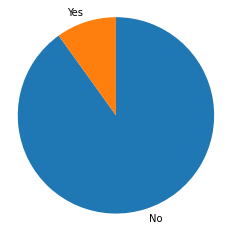

In [ ]:
plt.pie(sorted_Bikeshare, labels = sorted_Bikeshare.index, startangle = 90,counterclock = False)
plt.axis('square')

In [ ]:
data1['start_station_name'].nunique()

329

### 2) What are the most used Start Stations

In [ ]:
#we now check the values distribution in start station name column
data1['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [ ]:
Top_station_list = ['Market St at 10th St', 'San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Berry St at 4th St',
                   'Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)','San Francisco Caltrain (Townsend St at 4th St)'
                   'San Francisco Ferry Building (Harry Bridges Plaza)','Howard St at Beale St','Steuart St at Market St', 'Powell St BART Station (Market St at 5th St)'
                   ]

In [ ]:
sorted_top_station = data1['start_station_name'].value_counts().nlargest(10)

In [ ]:
sorted_top_station

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

<AxesSubplot:>

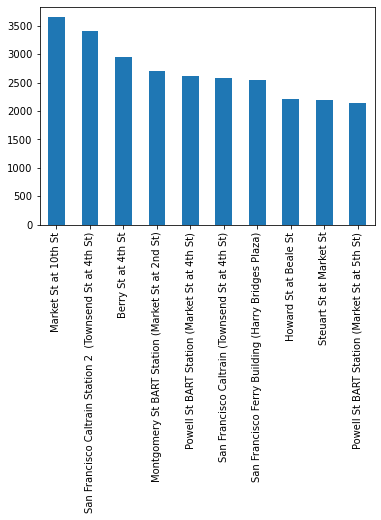

In [ ]:
sorted_top_station.plot(kind='bar')

#### Market St at 10th St  is the highest occuring start station name.

In [ ]:
top_list = list(sorted_top_station)

In [ ]:
data1['end_station_name'].nunique()

329

### 3) What are the Least used Start Stations

In [ ]:
sorted_least_station = data1['start_station_name'].value_counts().nsmallest(10)

In [ ]:
sorted_least_station

16th St Depot                             2
Palm St at Willow St                      3
21st Ave at International Blvd            4
Parker Ave at McAllister St               7
Willow St at Vine St                      9
Farnam St at Fruitvale Ave                9
Taylor St at 9th St                      13
Leavenworth St at Broadway               16
23rd Ave at Foothill Blvd                17
Backesto Park (Jackson St at 13th St)    17
Name: start_station_name, dtype: int64

<AxesSubplot:>

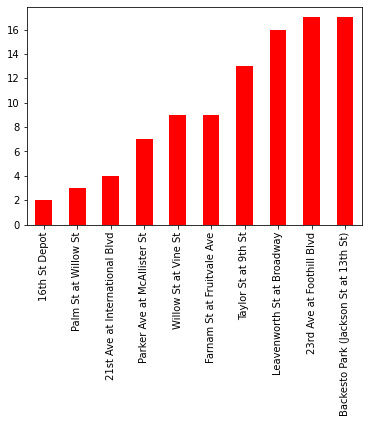

In [ ]:
sorted_least_station.plot(kind='bar', color='red')

#### 16th St Depot is the used Start Station

### 4) What are the ten (10) most Occuring End Stations

In [ ]:
data1['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
Willow St at Vine St                                            5
21st Ave at International Blvd                                  5
Name: end_station_name, Length: 329, dtype: int64

<AxesSubplot:>

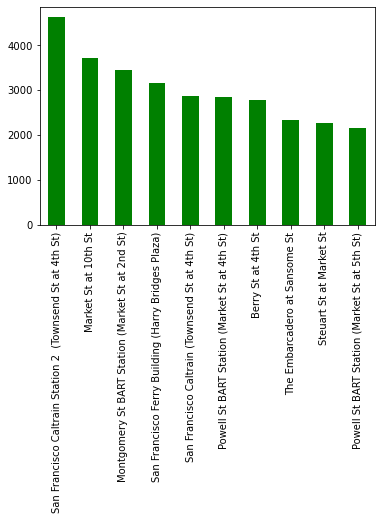

In [ ]:
data1['end_station_name'].value_counts().nlargest(10).plot(kind='bar', color='green')

#### The highest occuring end station name is San Francisco Caltrain Station 2  (Townsend St at 4th St)

### 5) What are the ten (10) Least used End Stations

In [ ]:
sorted_end_station = data1['end_station_name'].value_counts().nsmallest(10)

In [ ]:
sorted_end_station

Willow St at Vine St                      5
21st Ave at International Blvd            5
16th St Depot                             6
Palm St at Willow St                      7
Parker Ave at McAllister St               9
Farnam St at Fruitvale Ave               10
Taylor St at 9th St                      11
Leavenworth St at Broadway               12
Foothill Blvd at Harrington Ave          16
Backesto Park (Jackson St at 13th St)    18
Name: end_station_name, dtype: int64

<AxesSubplot:>

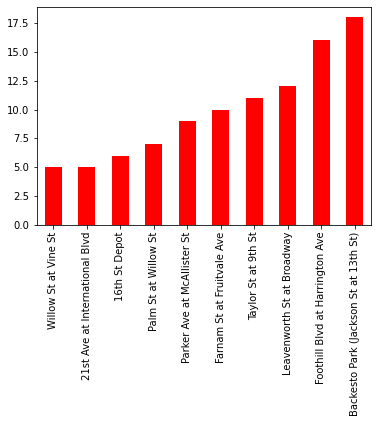

In [ ]:
sorted_end_station.plot(kind='bar', color='red')

#### Willow St at Vine St & 21st Ave at International Blvd are the least occuring end stations

### 6) What is the trend in the duration column

<AxesSubplot:>

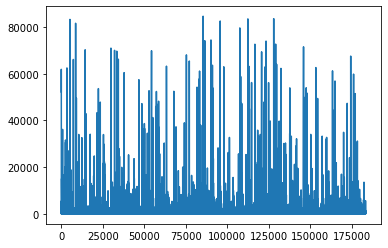

In [ ]:
data1['duration_sec'].plot()

In [ ]:
data1['start_station_latitude'].value_counts()

37.776619    3649
37.776639    3408
37.775880    2952
37.789625    2711
37.786375    2620
             ... 
37.778058       9
37.776101       7
37.784855       4
37.317298       3
37.766349       2
Name: start_station_latitude, Length: 329, dtype: int64

In [ ]:
data1['start_station_latitude'].nunique()

329

In [ ]:
data1['end_station_latitude'].nunique()

329

In [ ]:
data1['start_station_id'].nunique()

329

In [ ]:
data1['end_station_id'].nunique()

329

In [ ]:
data1['start_station_name'].nunique()

329

In [ ]:
data2 = data1.drop(labels=['start_station_id', 'start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude'], axis=1)

In [ ]:
data2.to_csv("Project3_clean.csv")
#Project3_clean= to_csv('data2')

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  int64         
 6   user_type                174952 non-null  object        
 7   member_birth_year        174952 non-null  int32         
 8   member_gender            174952 non-null  object        
 9   bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns](2), int32(1), int64(2), object(5)
memory usage: 14.0+ MB


### 7) What is the Distribution in the Start time Column

(array([   1000.,   10000.,  100000., 1000000.]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

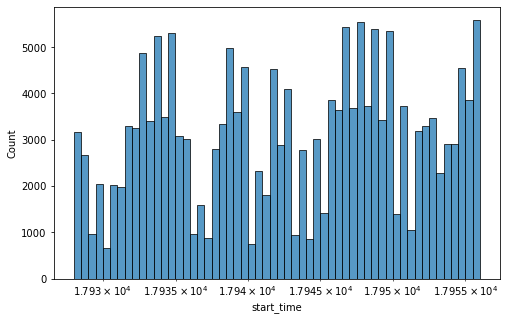

In [ ]:
plt.figure(figsize=[8, 5])
sb.histplot(data = data2['start_time'], log_scale=True)
plt.xticks(rotation=90)
#histogram_solution_1()

#### The visualization of the Start time column shows it is not uniformly dustributed

### 8) What is the Distribution in the End time Column

(array([17928., 17932., 17936., 17940., 17944., 17948., 17952., 17956.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

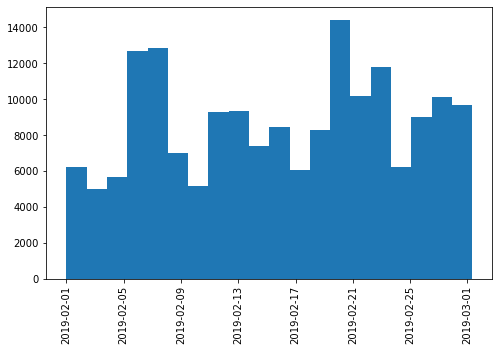

In [ ]:
plt.figure(figsize=[8, 5])
plt.hist(data2['end_time'], bins = 20)
plt.xticks(rotation=90)
#histogram_solution_1()

#### The distribution in the end time column shows is not uniformly distributed

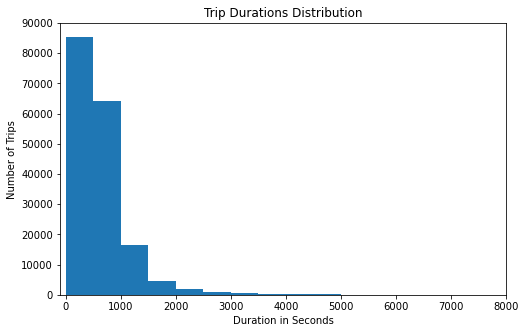

In [ ]:
bins = np.arange(0, data2['duration_sec'].max()+500, 500)

plt.figure(figsize=[8, 5])
plt.hist(data = data2, x = 'duration_sec', bins = bins)
plt.title('Trip Durations Distribution')
plt.xlabel('Duration in Seconds')
plt.ylabel('Number of Trips')
plt.axis([-100, 8000,0, 90000])
plt.show()

#### From the Visualization we can see that the data is skewed as such we will make some transformation on its axis

(array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

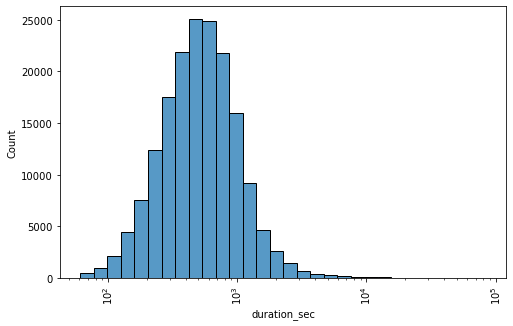

In [ ]:
plt.figure(figsize=[8, 5])
sb.histplot(data = data2['duration_sec'], bins=30, log_scale=True)
plt.xticks(rotation=90)

#### We now perform some transformations on the bins of its Axis. 

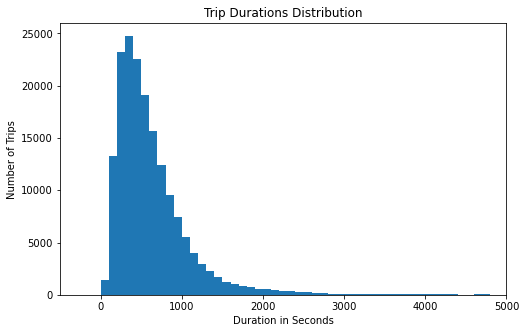

In [ ]:
bins = np.arange(0, data2['duration_sec'].max()+100, 100)

plt.figure(figsize=[8, 5])
plt.hist(data = data2, x = 'duration_sec', bins = bins)
plt.title('Trip Durations Distribution')
plt.xlabel('Duration in Seconds')
plt.ylabel('Number of Trips')
plt.xlim([-500,5000])
plt.show()

In [ ]:
(data2['duration_sec']).describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

### 9) What is the trend in the User Type Column

In [ ]:
data2.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

<AxesSubplot:>

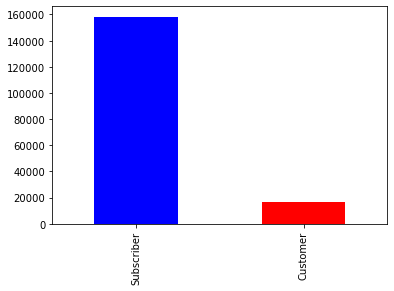

In [ ]:
data2.user_type.value_counts().plot(kind='bar', color=['b', 'r'])

In [ ]:
data2.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_name            329
end_station_name              329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

### 10) What are the trends in start time and end time.

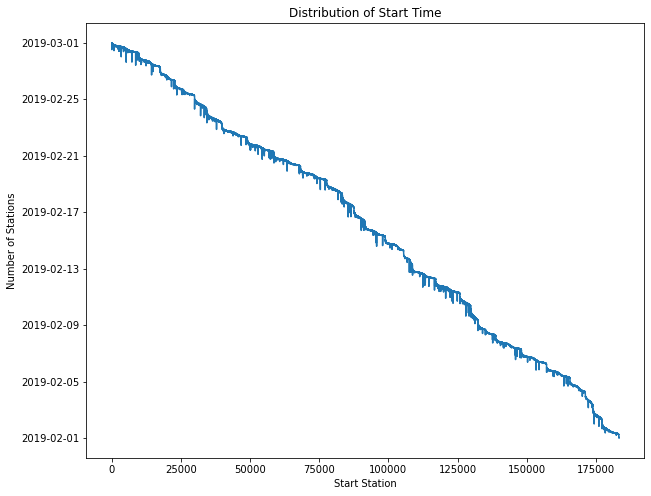

In [ ]:
data2['start_time'].plot(figsize=[10, 8])
#plt.figure(figsize=[20, 8])
#plt.xticks(range(0, 401, 10))
#plt.hist(data = df.dropna(), x = 'start_time', bins = bins)
plt.title('Distribution of Start Time')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

#### From the visualization we can see that as it gets earlier in the year, theStart time Duration decreases

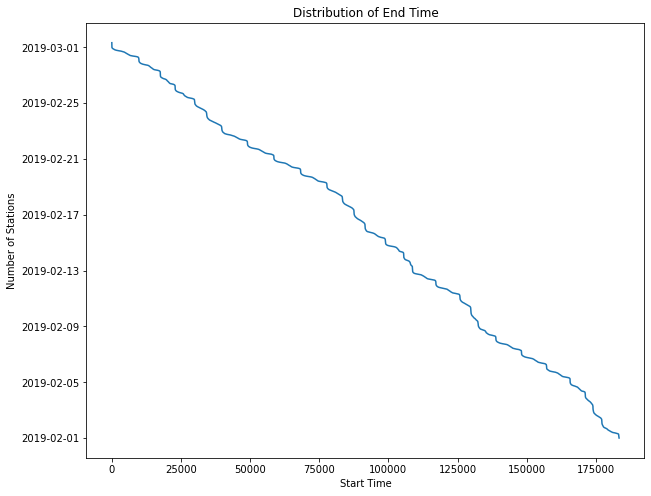

In [ ]:
data2['end_time'].plot(figsize=[10, 8])
#plt.figure(figsize=[20, 8])
#plt.xticks(range(0, 401, 10))
#plt.hist(data = df.dropna(), x = 'start_time', bins = bins)
plt.title('Distribution of End Time')
plt.xlabel('Start Time')
plt.ylabel('Number of Stations')
plt.show()

#### From the visualization we can see that as it gets later in the year, the End time Duration gets higher

### 11) What is the Age distribution of the Users

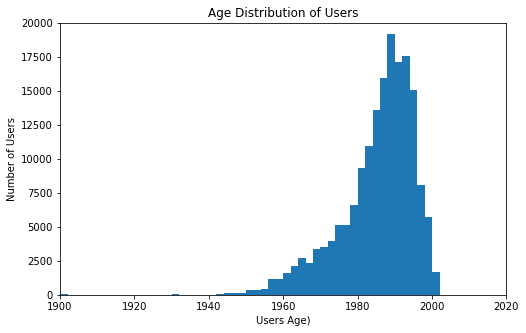

In [ ]:
# Plotting age distribution derived from member's birth year.
binsize = 2
bins = np.arange(0, data2['member_birth_year'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = data2, x = 'member_birth_year', bins = bins)
plt.axis([1900, 2020, 0, 20000])
plt.title('Age Distribution of Users')
plt.xlabel('Users Age)')
plt.ylabel('Number of Users')
plt.show()

#### From the histogram most users have birth years around 1980 - 2000

### 12) What is the gender distribution in the dataset.

(-1.1072592340323726,
 1.1203835586186992,
 -1.1199361631365747,
 1.107706629514497)

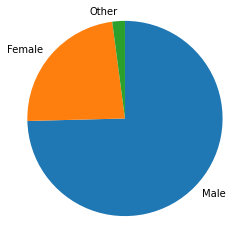

In [ ]:
# lets check for the distributionin the gender column
gender_sorted= data2['member_gender'].value_counts()
plt.pie(gender_sorted, labels = gender_sorted.index, startangle = 90,counterclock = False)
plt.axis('square')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I checked for bike share were I noticed most people are likely to not share trips, i also checked for trip durations which showed an unusual distribution, I later did a log transform to better show the distribution. I also checked the start time column where i noticed some un unusual distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I noticed the presence of some null values which i had to drop, i also noticed some incorrect data types in the the start  time, end time , duration and some other columns which i had to correct. i also dropped some columns that were not of benefit to our investigations.

## Bivariate Exploration



### 13) We check for relationship between Duration in seconds and Bike Share

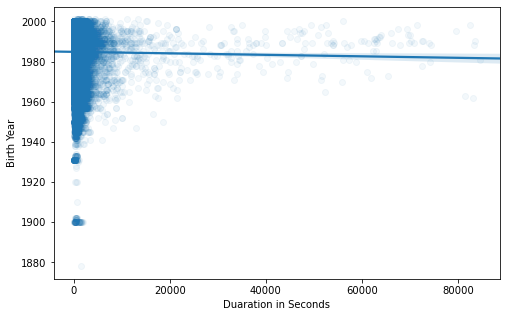

In [ ]:
plt.figure(figsize=[8,5])
sb.regplot(data = data2,y= 'member_birth_year', x= 'duration_sec', truncate=False, scatter_kws={'alpha':1/20});
#plt.axis([-5, 145, 500, 10500])
plt.xlabel('Duaration in Seconds')
plt.ylabel('Birth Year')
plt.show()

#### The plot seems overplotted we need to improve the visualization

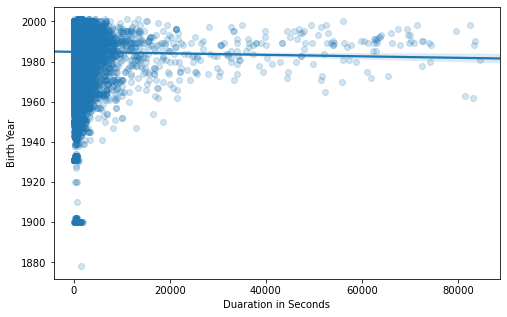

In [ ]:
plt.figure(figsize=[8,5])
sb.regplot(data = data2,y= 'member_birth_year', x= 'duration_sec', truncate=False, x_jitter=0.5,scatter_kws={'alpha':1/5});
#plt.axis([-5, 145, 500, 10500])
plt.xlabel('Duaration in Seconds')
plt.ylabel('Birth Year')
plt.show()
 

#### From this visualization we can see that younger people are more likely to go on longer trips

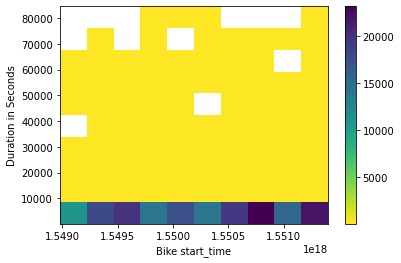

In [ ]:
plt.hist2d(data = data2, x = 'start_time', y = 'duration_sec', cmin=0.1, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Bike start_time')
plt.ylabel('Duration in Seconds');

#### This plot does not give us any clear correlation between both columns

### 14) Distribution of Users by their Trip Duration and User type

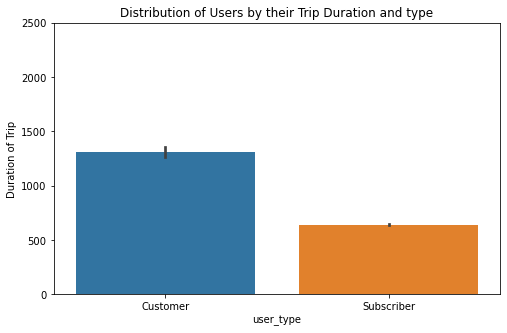

In [ ]:
plt.figure(figsize = (8,5))

sb.barplot(data=data2, x = "user_type", y="duration_sec")
plt.ylim([0, 2500])
plt.ylabel('Duration of Trip')

plt.title("Distribution of Users by their Trip Duration and type")

plt.show()

#### From this visualization we can see that the customer user are more likely to spend longer durations on the bikes

### 15) We now check for the Relationship between the member gender and the duration of trip and how many of then are likely to share trips

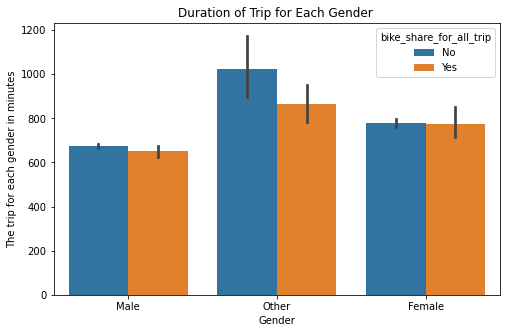

In [ ]:

plt.figure(figsize = (8,5))

sb.barplot(data = data2, x = "member_gender", y = "duration_sec", hue='bike_share_for_all_trip')
plt.xlabel('Gender')

plt.ylabel('The trip for each gender in minutes')


plt.title("Duration of Trip for Each Gender ")

plt.show()

#### From this visualization we can say other gender have the longest trip, followed by the Female gender then the Male Gender

### 16) We now Check for the Relationship Between the age and The Trip Duaration

C:\Users\User PC\miniconda3\envs\oyiza\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


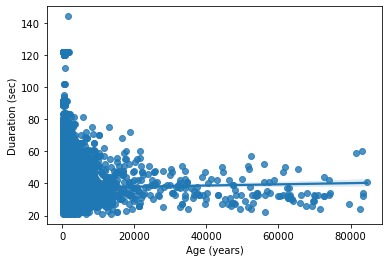

In [ ]:
#plt.figure(figsize=[8,5])
sb.regplot(data2['duration_sec'], (2022 - data2['member_birth_year']))
#plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.show()

#### From this visualization we can see that although many young people go on short trips, but younger people are alsomore likely to gonon longer trips.

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  int64         
 6   user_type                174952 non-null  object        
 7   member_birth_year        174952 non-null  int32         
 8   member_gender            174952 non-null  object        
 9   bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns](2), int32(1), int64(2), object(5)
memory usage: 14.0+ MB


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the visualization between Duration in seconds and Bike Share we were able see that for longer duartions, people are more likely to not share bikes.

> From this visualization we can see that younger people are more likely to go on longer trips

> From the visualization bewtween Trip Duration and User Type we could see that the "customer user" are more likely to spend longer durations on the bikes.

> From the visualization between Gender and Trip Duartion we can say other gender have the longest trip, followed by the Female gender then the Male Gender.

> From the visualization between Trip Duaration and Age we can see that although many young people go on short trips, but younger people are also more likely to go on longer trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed relationships between the Gender and Trip Duration, Age and Trip Duartions Also.

## Multivariate Exploration



In [ ]:
data2['user_type'].groupby(data2['start_station_name'])

### 17) What is the correlation between variables in the dataset

<AxesSubplot:>

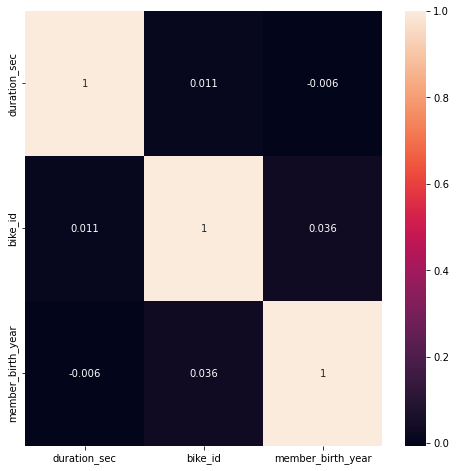

In [ ]:
import seaborn as sns
f,ax=plt.subplots(figsize=(8,8))
df_corr= data2.corr()
sns.heatmap(df_corr,annot=True)
#df.corr()

### 18) what is the correlation between some specific variables

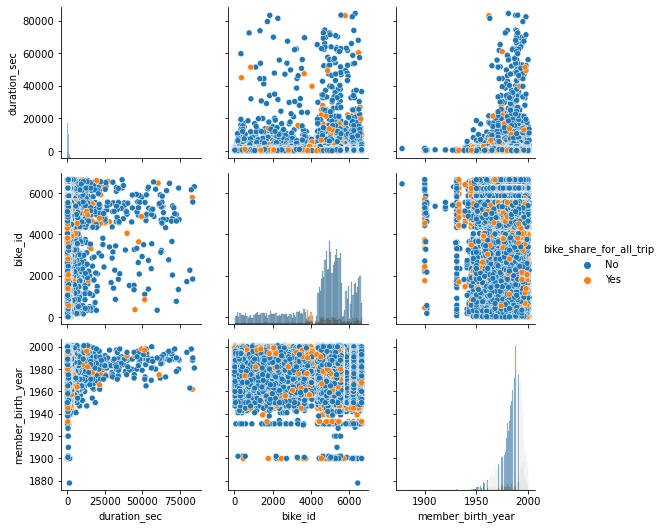

In [ ]:
g = sb.PairGrid(data = data2, hue='bike_share_for_all_trip');
#g.map(plt.scatter, alpha = 1/3);
g.map_diag(sb.histplot);
g.map_offdiag(sb.scatterplot);
g.add_legend()

### 20) We now check for the distribution in the User type Column

<Figure size 720x576 with 0 Axes>

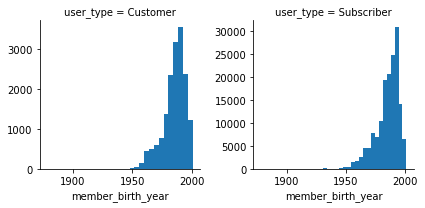

In [ ]:
plt.figure(figsize = [10,8])
g = sb.FacetGrid(data = data2, col = 'user_type', sharey=False)

g.map(plt.hist, "member_birth_year", bins=30)

In [ ]:
Top_station_list = ['Market St at 10th St', 'San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Berry St at 4th St',
                   'Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)','San Francisco Caltrain (Townsend St at 4th St)'
                   'San Francisco Ferry Building (Harry Bridges Plaza)','Howard St at Beale St','Steuart St at Market St', 'Powell St BART Station (Market St at 5th St)']
high_start_station = data2[data2['start_station_name'] == 'Market St at 10th St']
high_start_station

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
38,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,Market St at 10th St,29th St at Church St,5938,Subscriber,1992,Female,No,30
54,401,2019-02-28 23:30:52.471,2019-02-28 23:37:33.955,Market St at 10th St,Victoria Manalo Draves Park,5407,Subscriber,1990,Female,No,32
110,371,2019-02-28 23:01:15.077,2019-02-28 23:07:26.459,Market St at 10th St,Valencia St at 16th St,6435,Subscriber,1994,Male,No,28
114,376,2019-02-28 23:00:05.223,2019-02-28 23:06:21.515,Market St at 10th St,Montgomery St BART Station (Market St at 2nd St),5731,Subscriber,1982,Male,No,40
190,515,2019-02-28 22:28:11.347,2019-02-28 22:36:46.389,Market St at 10th St,5th St at Folsom,5234,Subscriber,1981,Other,No,41
...,...,...,...,...,...,...,...,...,...,...,...
183293,477,2019-02-01 05:26:32.609,2019-02-01 05:34:30.132,Market St at 10th St,Irwin St at 8th St,4369,Subscriber,1971,Male,No,51
183362,899,2019-02-01 01:08:39.015,2019-02-01 01:23:38.798,Market St at 10th St,Valencia St at 22nd St,2033,Subscriber,1999,Male,No,23
183364,892,2019-02-01 01:08:43.731,2019-02-01 01:23:35.763,Market St at 10th St,Valencia St at 22nd St,3392,Subscriber,2000,Male,No,22
183365,932,2019-02-01 01:07:51.908,2019-02-01 01:23:24.370,Market St at 10th St,Valencia St at 22nd St,4962,Subscriber,2000,Female,No,22


<AxesSubplot:xlabel='user_type', ylabel='duration_sec'>

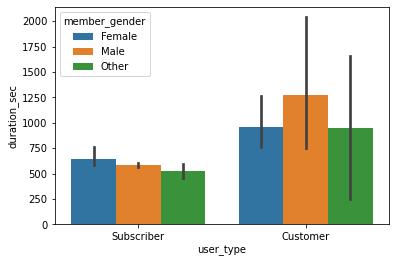

In [ ]:
sb.barplot(data=high_start_station, x='user_type', y='duration_sec', hue='member_gender')

#### From this analysis we can say that more Male Cutomer user type patronise the most Occuring Start Station

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> from the pair gird I noticed that the duration column had a suprising correlation with most of the other variables in the dataset.
> From the heat map I was suprised to find out that most of the variables in the dataset did not have a high correlation with each other.

### Were there any interesting or surprising interactions between features?

> From the heat map I was suprised to find out that most of the variables in the dataset did not have a high correlation with each other.

## Conclusions
> During this exploraton i first cleaned the dataset and dropped all null values after which i performed the uivariate exploration then the bivariate exploration and lastly the multivariate exploration.
